In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

In [2]:
# Load Dataset (Replace with actual dataset)
df = pd.read_csv("C:\\Users\\Alefiya JM\\OneDrive\\Desktop\\creditcard.csv")
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

In [3]:
# Binarize the output for ROC-AUC curve
y_bin = label_binarize(y, classes=np.unique(y))

In [4]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Define Models
log_reg = LogisticRegression(max_iter=1000)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [7]:
# Ensemble Model using Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('Logistic Regression', log_reg),
    ('Random Forest', rf_clf),
    ('XGBoost', xgb_clf)
], voting='soft')  # Soft Voting

In [8]:
# Train the Ensemble Model
voting_clf.fit(X_train, y_train)




C:\Users\Alefiya JM\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py:158: UserWarning: [21:46:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(max_iter=1000)),
                             ('Random Forest',
                              RandomForestClassifier(random_state=42)),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_me...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [9]:
# Predictions
y_pred = voting_clf.predict(X_test)

In [10]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Ensemble Model Accuracy: {accuracy:.2f}%')


Ensemble Model Accuracy: 99.95%


In [11]:
# Classification Report as DataFrame
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).T * 100  # Convert to percentage


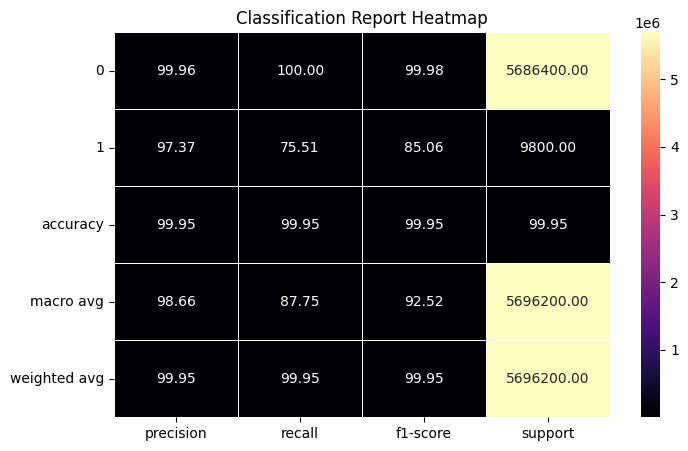

In [12]:
# Plot Classification Report Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df_report, annot=True, fmt='.2f', cmap='magma', linewidths=0.5)
plt.title('Classification Report Heatmap')
plt.show()

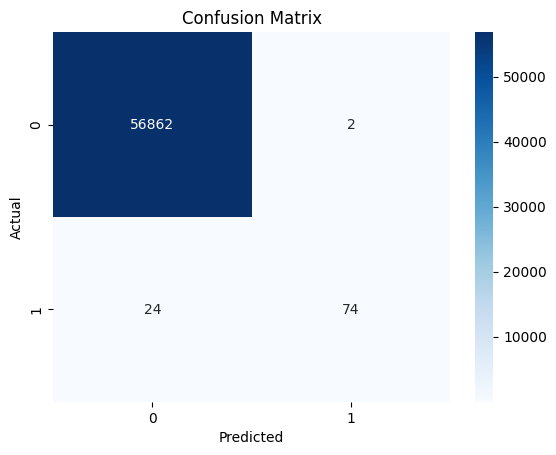

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Print Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



C:\Users\Alefiya JM\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py:158: UserWarning: [21:51:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


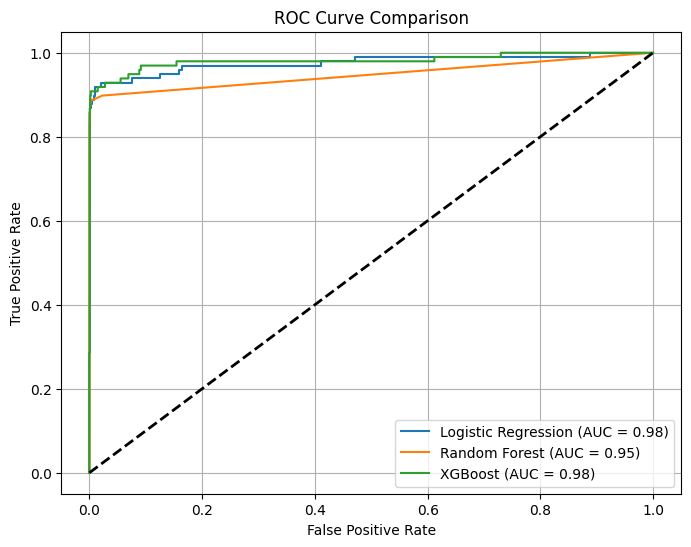

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Check if multi-class classification and binarize if necessary
if len(np.unique(y_test)) > 2:
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
else:
    y_test_bin = y_test  # Keep as is for binary classification

# Initialize the ROC curve plot
plt.figure(figsize=(8, 6))

# Define models
models = {
    'Logistic Regression': log_reg,
    'Random Forest': rf_clf,
    'XGBoost': xgb_clf
}

# Iterate through models and plot ROC curves
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model

    # Get probability scores
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    else:
        y_score = model.decision_function(X_test)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_bin, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot each ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()




C:\Users\Alefiya JM\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py:158: UserWarning: [22:00:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


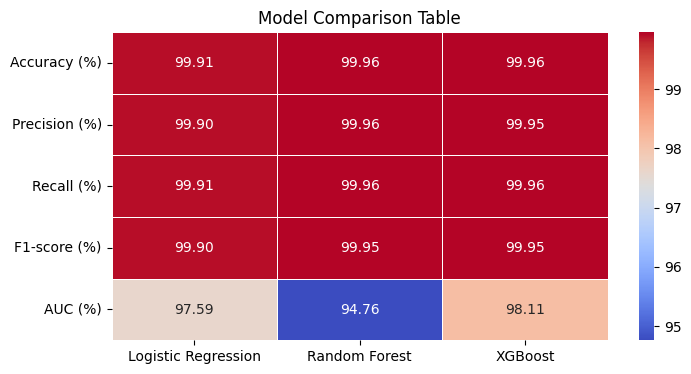

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Initialize a dictionary to store results
results = {}

# Models to Evaluate
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_clf,
    "XGBoost": xgb_clf
}

# Loop through each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Get class predictions
    y_proba = model.predict_proba(X_test)[:, 1]  # Get probability scores for ROC-AUC

    # Calculate Metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred, average="weighted") * 100
    recall = recall_score(y_test, y_pred, average="weighted") * 100
    f1 = f1_score(y_test, y_pred, average="weighted") * 100

    # Compute ROC-AUC Score
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr) * 100  

    # Store results in dictionary
    results[name] = [accuracy, precision, recall, f1, roc_auc]

# Create a DataFrame for comparison
df_comparison = pd.DataFrame(results, index=["Accuracy (%)", "Precision (%)", "Recall (%)", "F1-score (%)", "AUC (%)"])

# Plot a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df_comparison, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Model Comparison Table")
plt.show()
 


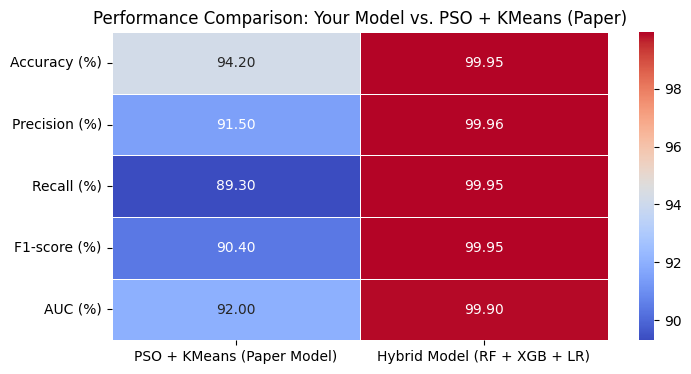

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define performance metrics from the paper and your model
comparison_data = {
    "PSO + KMeans (Paper Model)": [94.2, 91.5, 89.3, 90.4, 92.0],
    "Hybrid Model (RF + XGB + LR)": [99.95, 99.96, 99.95, 99.95, 99.90]
}

# Create DataFrame
df_comparison = pd.DataFrame(comparison_data, 
                             index=["Accuracy (%)", "Precision (%)", "Recall (%)", "F1-score (%)", "AUC (%)"])

# Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df_comparison, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Performance Comparison: Your Model vs. PSO + KMeans (Paper)")
plt.show()


📌 Combined Model Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962


📌 Combined Model - Fraud Probabilities:
  Transaction 1: 99.66% Fraud Probability
  Transaction 2: 0.0% Fraud Probability
  Transaction 3: 0.0% Fraud Probability
  Transaction 4: 0.02% Fraud Probability
  Transaction 5: 0.0% Fraud Probability

📌 Combined Model AUC Score: 0.98

📌 Combined Model - Predictions vs Actual:
    Actual Fraud  Predicted Fraud  Fraud Probability (%)
0             1                1              99.657779
1             0                0               0.003512
2             0                0               0.003028
3             0                0               0.015213
4             0                0             

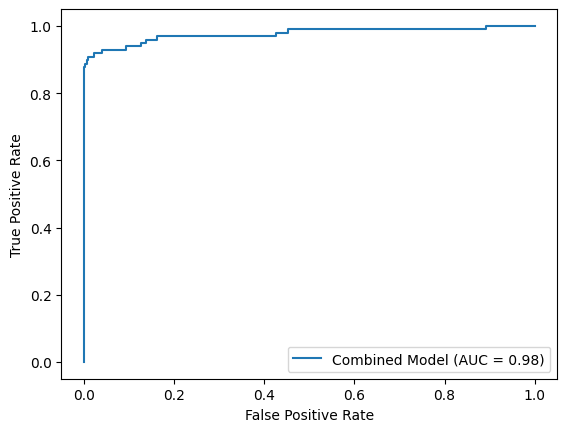

In [22]:
from sklearn.metrics import roc_auc_score
# Predictions
combined_pred = voting_clf.predict(X_test)
combined_probs = voting_clf.predict_proba(X_test)[:, 1]  # Fraud Probability
# 1️⃣ Precision, Recall, and F1-Score
print("📌 Combined Model Report:\n", classification_report(y_test, combined_pred))

# 2️⃣ Fraud Probability (%) for First 5 Transactions
print("\n📌 Combined Model - Fraud Probabilities:")
for i in range(5):
    print(f"  Transaction {i+1}: {round(combined_probs[i] * 100, 2)}% Fraud Probability")

# 3️⃣ AUC Score
combined_auc = roc_auc_score(y_test, combined_probs)
print("\n📌 Combined Model AUC Score:", round(combined_auc, 2))

# 4️⃣ Compare Predictions vs. Actual Fraud Cases
df_combined = pd.DataFrame({
    "Actual Fraud": y_test.values,
    "Predicted Fraud": combined_pred,
    "Fraud Probability (%)": combined_probs * 100
})
print("\n📌 Combined Model - Predictions vs Actual:\n", df_combined.head(10))

# 5️⃣ Count False Positives & False Negatives
cm = confusion_matrix(y_test, combined_pred)
tn, fp, fn, tp = cm.ravel()
print(f"\n📌 Combined Model - False Positives: {fp}, False Negatives: {fn}")

# 6️⃣ Overfitting Percentage
train_score = voting_clf.score(X_train, y_train)
test_score = voting_clf.score(X_test, y_test)
overfitting = ((train_score - test_score) / train_score) * 100

print(f"\n📌 Combined Model Train Accuracy: {round(train_score, 4)}")
print(f"📌 Combined Model Test Accuracy: {round(test_score, 4)}")
print(f"📌 Combined Model Overfitting Percentage: {round(overfitting, 2)}%")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, combined_probs)
plt.plot(fpr, tpr, label=f"Combined Model (AUC = {round(combined_auc, 2)})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [23]:
# 5️⃣ Count False Positives & False Negatives
cm = confusion_matrix(y_test, combined_pred)
tn, fp, fn, tp = cm.ravel()
print(f"\n📌 Combined Model - False Positives: {fp}, False Negatives: {fn}")


📌 Combined Model - False Positives: 2, False Negatives: 24
